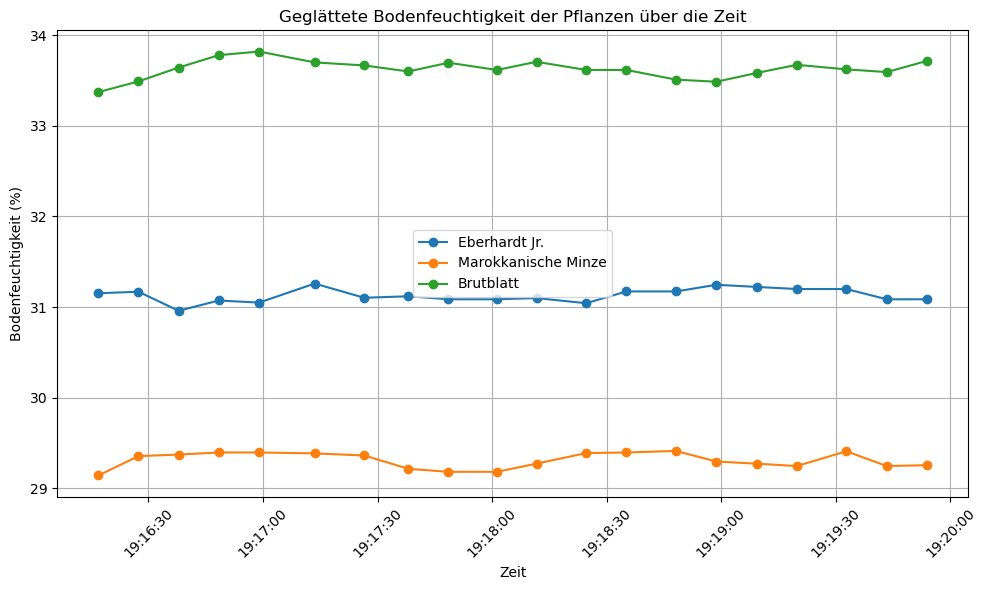

In [51]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import requests
import json
import numpy as np

# Simulierte Anfrage - in deinem Fall durch echte Anfrage ersetzen
r = requests.get('http://127.0.0.1:8080/data')
response = json.loads(r.text)

timestamps = []
eberhardt_humidity = []
marokkanische_minze_humidity = []
brutblatt_humidity = []

for read in response["sensorReads"]:
    timestamps.append(read["timestamp"])
    eberhardt_humidity.append(read["plants"][0]["humidity"])
    marokkanische_minze_humidity.append(read["plants"][1]["humidity"])
    brutblatt_humidity.append(read["plants"][2]["humidity"])

# Zeitstempel in datetime umwandeln
timestamps = [datetime.fromisoformat(ts[:-15]) for ts in timestamps]

# Gleitender Durchschnitt für Glättung
def moving_average(data, window_size=3):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Daten glätten
eberhardt_smoothed = moving_average(eberhardt_humidity)
minze_smoothed = moving_average(marokkanische_minze_humidity)
brutblatt_smoothed = moving_average(brutblatt_humidity)

# Zeitstempel anpassen, damit sie zur geglätteten Datenlänge passen
timestamps_smoothed = timestamps[:len(eberhardt_smoothed)]

# Plot erstellen
plt.figure(figsize=(10, 6))

# Daten plotten
plt.plot(timestamps_smoothed, eberhardt_smoothed, label="Eberhardt Jr.", marker='o')
plt.plot(timestamps_smoothed, minze_smoothed, label="Marokkanische Minze", marker='o')
plt.plot(timestamps_smoothed, brutblatt_smoothed, label="Brutblatt", marker='o')

# Formatierung der x-Achse für Zeitstempel
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Labels und Titel
plt.xlabel("Zeit")
plt.ylabel("Bodenfeuchtigkeit (%)")
plt.title("Geglättete Bodenfeuchtigkeit der Pflanzen über die Zeit")
plt.legend()

# Plot anzeigen
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
